In [1]:
import torch
from torch import nn


import torchvision

from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)


c:\Users\DELL\anaconda3\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.12.1
0.13.1


In [2]:
#* loading the dataset 
## MNIST Dataset
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root='data',
    train=True, #*do we want the testing dataset
    download=True,
    transform= torchvision.transforms.ToTensor(), #*how do we want to transform the features or data
    target_transform=None #*how do we want to transform labels or target
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)




In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [6]:
train_data[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [7]:
train_data[0][0][0].shape

torch.Size([28, 28])

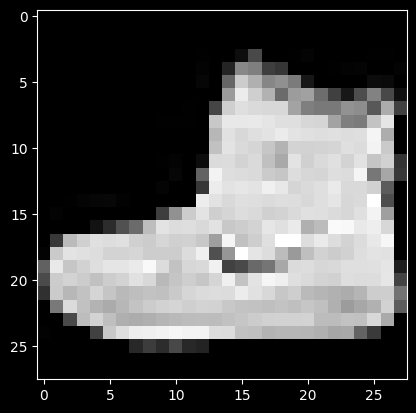

In [8]:
data, names  = train_data[0]
plt.imshow(data[0], cmap='gray')

In [9]:
class_names_dict = train_data.class_to_idx 
class_names = train_data.classes
class_names_dict, class_names

({'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9},
 ['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'])

In [10]:
class_names_dict.items()
class_dict = {value: key for key, value in class_names_dict.items()}
class_dict

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

## Visualize 

Text(0.5, 1.0, 'Ankle boot')

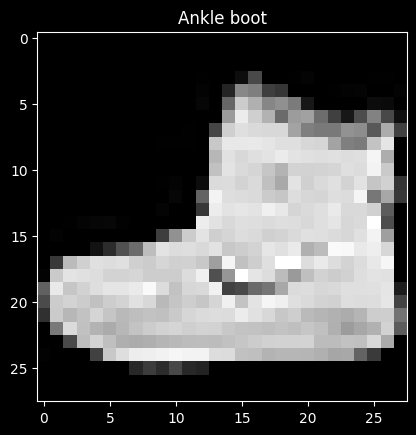

In [11]:
import matplotlib.pyplot as plt
image, label  = train_data[0]
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"{class_dict[label]}")

In [12]:
ran_num = torch.randint(0, len(train_data), size=[3])
ran_num, ran_num[0].item()

(tensor([57139, 37975, 46271]), 57139)

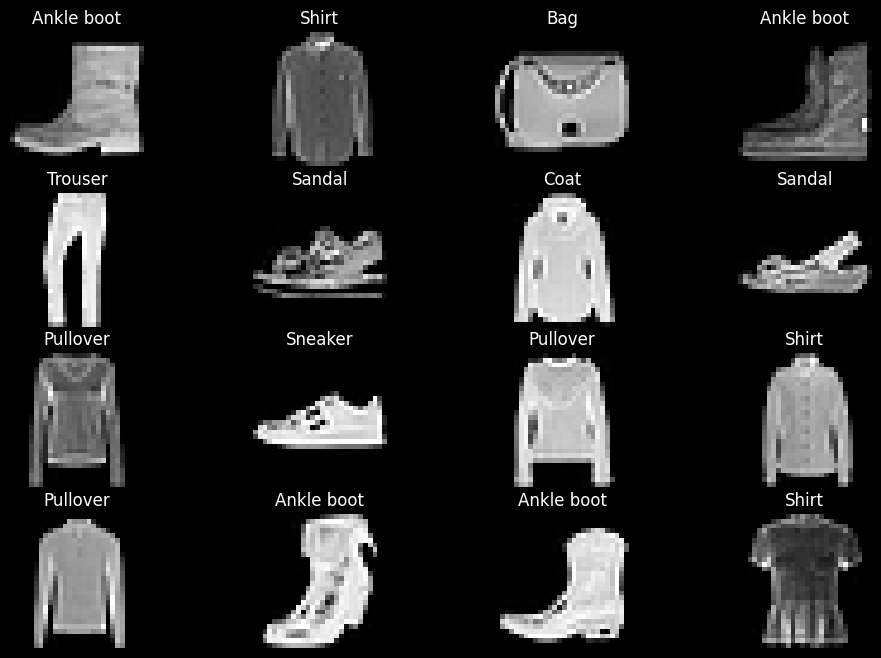

In [13]:
torch.manual_seed(42)
fig = plt.figure(figsize=(12, 8))
rows, cols = 4, 4

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    #print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"{class_dict[label]}")
    plt.axis(False)
    plt.grid(False)

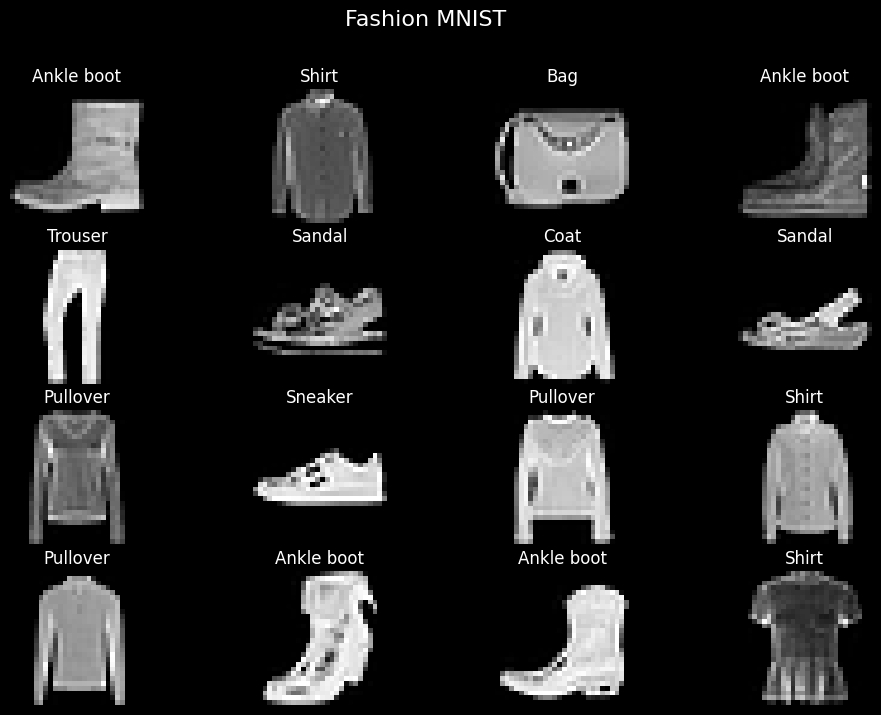

In [14]:
torch.manual_seed(42)
fig = plt.figure(figsize=(12, 8))
fig.suptitle("Fashion MNIST", fontsize=16)
fig.tight_layout()
rows , cols = 4, 4
for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    plt.axis(False)
    plt.imshow(train_data[random_idx][0].squeeze(), cmap="gray")
    plt.title(f"{class_dict[train_data[random_idx][1]]}")

In [15]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_data_loader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_data_loader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [16]:
type(train_data_loader)
next(iter(train_data_loader))[0].shape,len(train_data_loader), len(test_data_loader)

(torch.Size([32, 1, 28, 28]), 1875, 313)

## interacting with DataLoader

In [17]:
# checking out what's insde the data loader
train_data_features, train_data_labels = next(iter(train_data_loader))
train_data_features.shape , train_data_labels.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

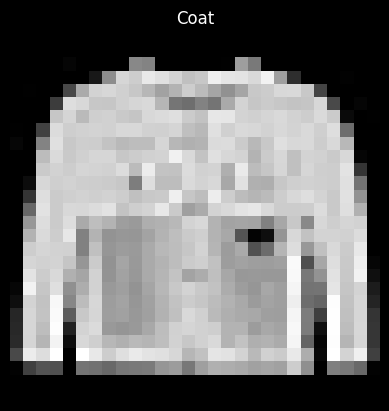

In [18]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_data_features),size=[1]).item()
plt.imshow(train_data_features[random_idx].squeeze(), cmap="gray")
plt.title(f"{class_dict[train_data_labels[random_idx].item()]}")
plt.axis(False)


## Building the model

In [19]:
#* Flatten layers
flatten = nn.Flatten()

In [20]:
x = train_data_features[0]
flatten_x  = flatten(x)
x.squeeze().shape , flatten_x.squeeze().shape

(torch.Size([28, 28]), torch.Size([784]))

In [21]:
from torch import nn 
class Fashion_model(nn.Module):
    def __init__(self, 
                 input_shape :int,
                 hidden_uints: int, 
                 output_shape: int) -> None:
        super().__init__()

        self.Linear_block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape,hidden_uints),
            nn.Linear(hidden_uints, output_shape)
        )
    def forward(self, x:torch.tensor):
        return self.Linear_block(x)

In [22]:
torch.manual_seed(42)
shape = train_data_features[0].squeeze().shape[0] * train_data_features[0].squeeze().shape[1]
model = Fashion_model(
    input_shape= shape,
    hidden_uints=shape*3,
    output_shape=len(class_dict)
)
model

Fashion_model(
  (Linear_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=2352, bias=True)
    (2): Linear(in_features=2352, out_features=10, bias=True)
  )
)

In [23]:
x = train_data_features[0]
model(x).shape

torch.Size([1, 10])

In [24]:
from functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params= model.parameters(),
    lr = 0.01
)

## Timing Out Experince


In [25]:
from timeit import default_timer as timer

def print_train_time(
    start:float,
    end:float,
    device:torch.device = None
):
    total_time = end - start
    if device == "cpu":
        print(f"Model took {total_time}s training on CPU")
    else:
        print(f"model Took {total_time}s training on {torch.cuda.get_device_name()}")
        
    return total_time

## Progress bar - TQDM

In [26]:
#!pip install tqdm

In [27]:


torch.manual_seed(42)
model = model.to('cpu')

## Training on CPU
train_time_start_on_cpu = timer()

epochs = 10
for epoch in range(epochs):
    model.train()
    logits = model(train_data_features)
    
    loss = loss_fn(logits, train_data_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

train_time_end_on_cpu = timer()

cpu_time = print_train_time(
    start= train_time_start_on_cpu,
    end= train_time_end_on_cpu,
    device='cpu'
)

model = model.to('cuda')
train_data_features_cuda = train_data_features.to('cuda')
train_data_labels_cuda = train_data_labels.to('cuda')

train_time_start_on_gpu = timer()
epochs = 10
for epoch in range(epochs):
    model.train()
    logits = model(train_data_features_cuda)
    
    loss = loss_fn(logits, train_data_labels_cuda)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
train_time_end_on_gpu = timer()

gpu_time = print_train_time(
    start= train_time_start_on_gpu,
    end= train_time_end_on_gpu,
    device='gpu'
)

print(f"GPU is {cpu_time/gpu_time} x faster than CPU")

Model took 0.10051249999997935s training on CPU
model Took 2.1633222999999475s training on NVIDIA GeForce GTX 1650
GPU is 0.04646210137064726 x faster than CPU


In [28]:
next(iter(train_data_loader))[0].shape

torch.Size([32, 1, 28, 28])

In [63]:
import pandas as pd 
from tqdm.auto import tqdm
import time
from IPython.display import display, clear_output

In [66]:
#!pip install --upgrade ipywidgets
# !pip uninstall ipywidgets
# !pip install ipywidgets==7.7.2

In [71]:
for i in tqdm(range(100)):
    print(i)
    time.sleep(0.1)
    
    continue

100%|██████████| 100/100 [00:11<00:00,  9.03it/s]


In [38]:
train_data_loader.dataset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

### Training on CPU

In [118]:
epochs = 1
device = 'cpu'

start_time = timer()

model = model.to(device)

for epoch in tqdm(range(epochs)):
#for epoch in range(epochs):
    total_loss = 0
    total_acc = 0
    
    
    for batch, (X,y) in enumerate(train_data_loader):
        model.train()
        
        logits = model(X.to(device))
        ypreds = torch.softmax(logits, dim=1).argmax(dim=1)
        loss = loss_fn(logits, y.to(device))
        acc = accuracy_fn(y_pred= ypreds, y_true=y.to(device))
        
        total_loss += loss
        total_acc += acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 500 ==0:
            print(f"looked at {batch * len(X)}/{len(train_data_loader.dataset)}") 
        
    loss_train = total_loss/len(train_data_loader)
    acc_train = total_acc/len(train_data_loader)
    clear_output()
    
    # Testing
    test_loss , acc_test = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in test_data_loader:
            logits = model(X)
            loss = loss_fn(logits, y)
            test_loss += loss
            acc_test += accuracy_fn(y_pred= torch.softmax(logits,dim=1).argmax(dim=1), y_true=y)
            
        loss_test = test_loss/len(test_data_loader)
        acc_test = acc_test/len(test_data_loader)
        
    print(f"Epoch: {epoch}\n------")
    print(f"Train ----- train Acc = {acc_train:.2f}% || train Loss = {loss_train:.5f}")
    print(f"Test ------ test Acc = {acc_test:.2f}% || test Loss = {loss_test:.5f}")

end_time = timer()
Time_calculated = print_train_time(
    start= start_time,
    end= end_time,
    device=device
)

100%|██████████| 1/1 [00:20<00:00, 20.99s/it]

Train ----- Acc = 86.61% || Loss = 0.38409
Test ------ test Acc = 84.38% || test Loss = 0.44026
Model took 20.99865890000001s training on CPU


In [83]:
from torch.utils.data import dataloader

In [114]:
torch.manual_seed(42)

def eval_model(
    model:torch.nn.Module,
    data_loader : torch.utils.data.DataLoader,
    loss_fn : torch.nn.Module,
    accuracy_fn):
    
    loss, acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            ypreds = model(X)
            
            loss += loss_fn(ypreds,y)
            acc += accuracy_fn(y_true= y, y_pred =ypreds.argmax(dim=1))
            
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name" : model.__class__.__name__,
            "model_loss" : loss.item(),
            "model_acc" : str(round(acc, 2))+"%"
    }

In [116]:
eval_model(
    model=model,
    data_loader=test_data_loader,
    loss_fn=nn.CrossEntropyLoss(),
    accuracy_fn=accuracy_fn
)

100%|██████████| 313/313 [00:01<00:00, 202.69it/s]


{'model_name': 'Fashion_model',
 'model_loss': 0.4402656555175781,
 'model_acc': '84.43%'}

### Training on GPU

In [176]:
import torch 
device = "cuda" if torch.cuda.is_available() else "cpu"
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_data_loader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_data_loader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)
device

'cuda'

In [177]:
class non_linear_model(nn.Module):
    def __init__(self, input_shape, output_shape, hidden_units):
        super().__init__()
        
        self.Non_linerar_block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.LeakyReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.LeakyReLU(),
            nn.Linear(hidden_units, output_shape),
            nn.LeakyReLU()
        )
        
    def forward(self,x):
        return self.Non_linerar_block(x)
            

In [178]:
nl_model = non_linear_model(
    input_shape= 28*28,
    hidden_units= 10,
    output_shape= 10
).to(device)

next(nl_model.parameters()).device

device(type='cuda', index=0)

In [179]:
from functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(nl_model.parameters(), lr=0.1)


In [180]:
logits = nl_model(train_data_features_cuda[0])
logits.argmax(dim=1), torch.softmax(logits, dim=1).argmax(dim=1)

(tensor([3], device='cuda:0'), tensor([3], device='cuda:0'))

In [181]:
len(train_data_loader), len(test_data_loader)

(1875, 313)

In [199]:

## Training step
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn: torch.nn.Module,
    epoch: int,
    show_every :int = 1,
    device: torch.device = device,
    
):
# for epoch in range(epochs):
    loss_train, acc_train = 0, 0

    model.train()

    for batch, (X, y) in enumerate(data_loader):
        x, y = X.to(device), y.to(device)

        logits = model(x)
        ypreds = torch.softmax(logits, dim=1).argmax(dim=1)
        loss = loss_fn(logits, y)
        acc = accuracy_fn(y_pred=ypreds, y_true=y)

        loss_train += loss
        acc_train += acc

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_train /= len(data_loader)
    acc_train /= len(data_loader)

    if epoch % show_every ==0:
        #clear_output()
        print(
            f"Epoch: {epoch}\n------ train Acc = {acc_train:.2f}% || train Loss = {loss_train:.5f}")


## Testing Step
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn: torch.nn.Module,
    epoch: int,
    show_every :int = 1,
    device: torch.device = device,
    
):
    loss_test, acc_test = 0, 0
    model.eval()
    with torch.inference_mode():
        for batch , (x, y) in enumerate(data_loader):
            x, y = x.to(device), y.to(device)
            
            logits = model(x)
            ypreds = torch.softmax(logits, dim=1).argmax(dim=1)
            loss = loss_fn(logits, y)
            acc = accuracy_fn(y_pred=ypreds, y_true=y)
            
            loss_test += loss
            acc_test += acc
        
        loss_test /= len(data_loader)
        acc_test /= len(data_loader)
        if epoch % show_every ==0:
            #clear_output()
            print(f"------ test Acc = {acc_test:.2f}% || test Loss = {loss_test:.5f}")


In [200]:
epochs = 10
start_time = timer()
for epoch in tqdm(range(1, epochs+1)):
    
    train_step(
        model=model,
        data_loader=train_data_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        epoch = epoch,
        show_every = 2,
        accuracy_fn=accuracy_fn,

    )

    test_step(
        model=model,
        data_loader=test_data_loader,
        loss_fn=loss_fn,
        optimizer=optimizer,
        epoch = epoch,
        show_every = 2,
        accuracy_fn=accuracy_fn,
    )
    

end_time = timer()
Time_calculated = print_train_time(
    start=start_time,
    end=end_time,
    device=device
)


Epoch: 1
------ train Acc = 73.57% || train Loss = 0.82178
------ test Acc = 78.10% || test Loss = 0.64297
model Took 17.65822130000015s training on NVIDIA GeForce GTX 1650
